In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lats = []
city_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lats.append(lat_lng[0])
        city_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

620

In [3]:
# cities = np.asarray(cities)

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
city_read = []
lats_read = []
lngs_read = []
weather = []
wind = []

city_num = 0

# Loop through the list of cities and perform a request for data on each
for city in cities:
    city_num = city_num + 1
    response = requests.get(query_url + city).json()

    #print(response)
    try:
        weather.append(response['main'])
        wind.append(response['wind'])
        city_read.append(city)
        lats_read.append(city_lats[city_num - 1])
        lngs_read.append(city_lngs[city_num - 1])
        print(f"Processing record {city_num} of {len(cities)}" + " | " + city)
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

# print(f"The weather: {weather}")
# print(f"The wind: {wind}")

Processing record 1 of 620 | saint-paul-les-dax
Processing record 2 of 620 | dunedin
Processing record 3 of 620 | bethel
Processing record 4 of 620 | cayenne
Processing record 5 of 620 | punta arenas
Processing record 6 of 620 | esperance
Processing record 7 of 620 | itoman
Processing record 8 of 620 | port alfred
Processing record 9 of 620 | jamestown
Processing record 10 of 620 | graaff-reinet
Processing record 11 of 620 | cape town
Processing record 12 of 620 | maceio
Missing field/result... skipping.
Processing record 14 of 620 | hithadhoo
Processing record 15 of 620 | rikitea
Processing record 16 of 620 | port elizabeth
Processing record 17 of 620 | acapulco
Processing record 18 of 620 | korsor
Missing field/result... skipping.
Processing record 20 of 620 | tigil
Processing record 21 of 620 | kentau
Processing record 22 of 620 | pasighat
Processing record 23 of 620 | saldanha
Processing record 24 of 620 | karratha
Processing record 25 of 620 | hasaki
Processing record 26 of 620 | 

In [5]:
weather_df = pd.DataFrame(weather)
wind_df = pd.DataFrame(wind)
#wind_df.rename(columns={"deg":"deg","speed":"wind"})

full_weather_df = pd.concat([weather_df,wind_df], axis=1)
full_weather_df

,grnd_level,humidity,pressure,sea_level,temp,temp_max,temp_min,deg,gust,speed
0,NaN,56,1021.00,NaN,20.29,21.11,19.44,NaN,NaN,1.50
1,NaN,62,1010.00,NaN,12.78,12.78,12.78,70.000,2.24,1.34
2,NaN,93,1026.00,NaN,2.02,3.00,1.00,130.000,NaN,3.60
3,NaN,62,1012.00,NaN,32.00,32.00,32.00,88.466,NaN,4.18
4,NaN,93,991.00,NaN,1.89,2.00,1.67,260.000,NaN,12.90
5,NaN,87,1029.00,NaN,9.00,9.00,9.00,70.000,NaN,3.60
6,NaN,74,1016.00,NaN,23.88,26.00,22.00,20.000,NaN,4.10
7,NaN,95,1013.00,NaN,17.22,17.22,17.22,264.000,7.60,3.58
8,984.49,95,1021.62,1021.62,6.65,6.65,6.65,241.940,NaN,4.44
9,936.57,29,1013.30,1013.30,22.45,22.45,22.45,218.712,NaN,5.62


In [6]:
full_weather_df['city'] = city_read
full_weather_df['lat'] = lats_read
full_weather_df['lng'] = lngs_read

full_weather_df.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_max,temp_min,deg,gust,speed,city,lat,lng
0,NaN,56,1021.0,NaN,20.29,21.11,19.44,NaN,NaN,1.50,saint-paul-les-dax,43.887274,-1.148466
1,NaN,62,1010.0,NaN,12.78,12.78,12.78,70.000,2.24,1.34,dunedin,-53.399914,176.492639
2,NaN,93,1026.0,NaN,2.02,3.00,1.00,130.000,NaN,3.60,bethel,51.928679,-166.860120
3,NaN,62,1012.0,NaN,32.00,32.00,32.00,88.466,NaN,4.18,cayenne,17.208133,-43.526927
4,NaN,93,991.0,NaN,1.89,2.00,1.67,260.000,NaN,12.90,punta arenas,-67.152703,-109.463995


In [7]:
full_weather_df.set_index('city',inplace=True)
full_weather_df.head()

,grnd_level,humidity,pressure,sea_level,temp,temp_max,temp_min,deg,gust,speed,lat,lng
city,,,,,,,,,,,,
saint-paul-les-dax,NaN,56,1021.0,NaN,20.29,21.11,19.44,NaN,NaN,1.50,43.887274,-1.148466
dunedin,NaN,62,1010.0,NaN,12.78,12.78,12.78,70.000,2.24,1.34,-53.399914,176.492639
bethel,NaN,93,1026.0,NaN,2.02,3.00,1.00,130.000,NaN,3.60,51.928679,-166.860120
cayenne,NaN,62,1012.0,NaN,32.00,32.00,32.00,88.466,NaN,4.18,17.208133,-43.526927
punta arenas,NaN,93,991.0,NaN,1.89,2.00,1.67,260.000,NaN,12.90,-67.152703,-109.463995


In [8]:
full_weather_df.to_csv('weather_data.csv')

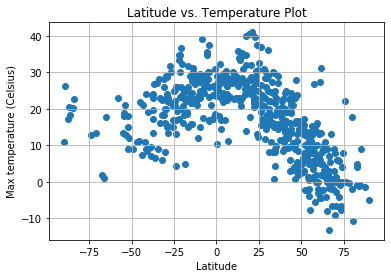

In [9]:
# Build a scatter plot - Latitude vs. Temperature
plt.scatter(full_weather_df["lat"], full_weather_df["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (Celsius)")

plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

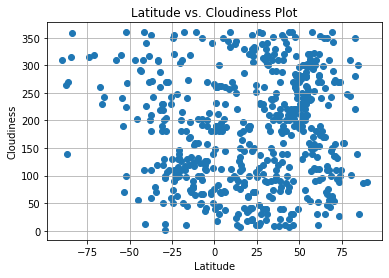

In [10]:
# Build a scatter plot - Latitude vs. Cloudiness
plt.scatter(full_weather_df["lat"], full_weather_df["deg"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

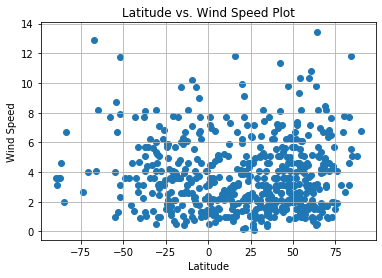

In [11]:
# Build a scatter plot - Latitude vs. Wind Speed
plt.scatter(full_weather_df["lat"], full_weather_df["speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()